In [103]:
!pip install lightgbm xgboost


In [104]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")



In [57]:
#load the train and test datasets
df_train=pd.read_csv("Titanic_train.csv")
df_test=pd.read_csv("Titanic_test.csv")

In [58]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
#take a summary of these datasets
train_summary=df_train.describe()
test_summary=df_test.describe()
print(train_summary)
print(test_summary)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [61]:
#find information about datasets

train_info=df_train.info()
test_info=df_test.info()
print(df_train)
print(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [62]:
# Checking for missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


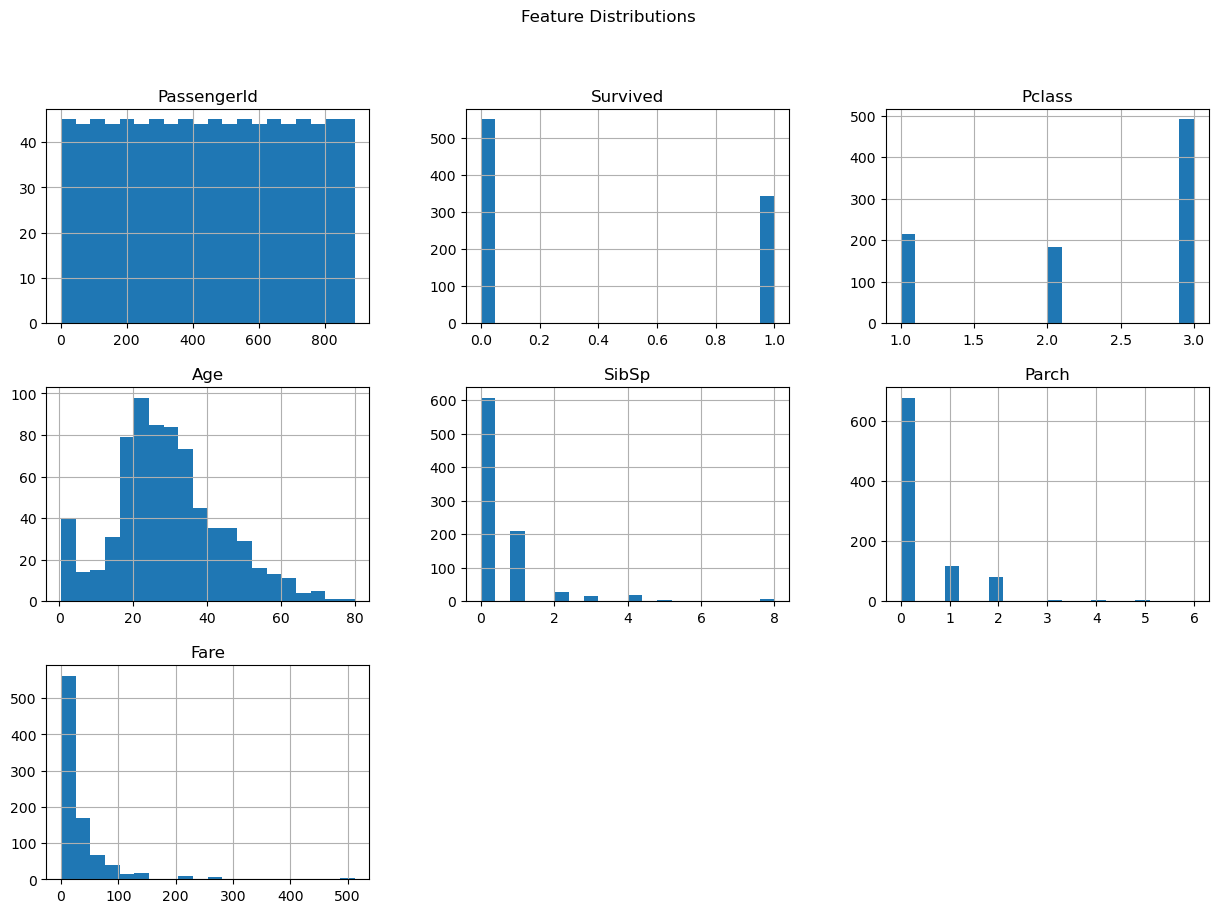

In [63]:
# Data distributions
df_train.hist(bins=20, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

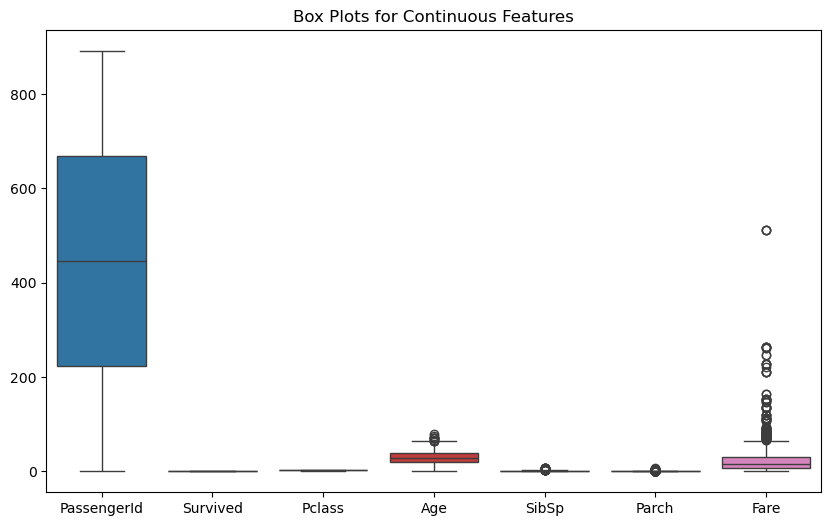

In [64]:
# Box plots for outlier analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plots for Continuous Features")
plt.show()


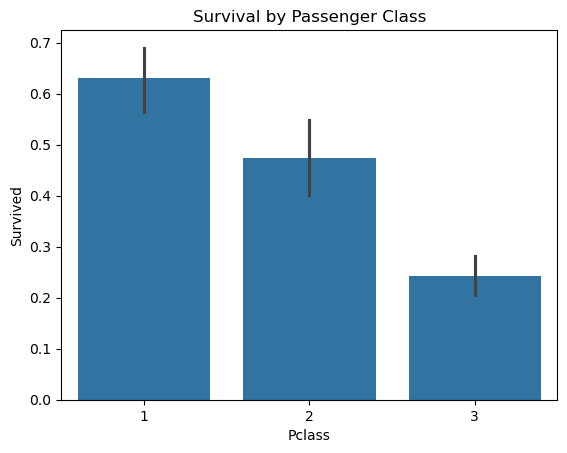

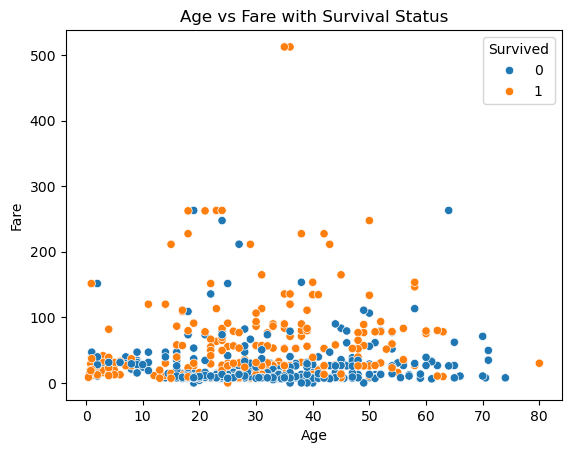

In [65]:
# Visualizing relationships between features and survival
sns.barplot(data=df_train, x='Pclass', y='Survived')
plt.title("Survival by Passenger Class")
plt.show()

sns.scatterplot(data=df_train, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare with Survival Status")
plt.show()

In [66]:
# Imputing missing values for Age and Fare using median strategy
imputer = SimpleImputer(strategy="median")
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_test['Age'] = imputer.transform(df_test[['Age']])



In [67]:
df_test['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413    28.0
414    39.0
415    38.5
416    28.0
417    28.0
Name: Age, Length: 418, dtype: float64

In [68]:
df_train['Age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [69]:
dff=df_train.corr(numeric_only=True)
dff

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [70]:
dff_test=df_test.corr(numeric_only=True)
dff_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.031309,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.460143,0.001087,0.018721,-0.577147
Age,-0.031309,-0.460143,1.000000,-0.073820,-0.044191,0.342015
SibSp,0.003818,0.001087,-0.073820,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.044191,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.342015,0.171539,0.230046,1.000000


In [71]:
#Impute Embarked (categorical) with most frequent value
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)



C:\Users\srush\AppData\Local\Temp\ipykernel_12456\1860519021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [72]:
# Encoding categorical variables
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True)

In [73]:
df_train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False


In [74]:
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True
416,1308,3,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,NaN,True,False,True


In [75]:
df_train.drop(['Cabin'],axis=1,inplace=True)

In [76]:
df_train.drop(['Name', 'Ticket'], axis=1 ,inplace=True)

In [77]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,True,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,True
888,889,0,3,28.0,1,2,23.4500,False,False,True
889,890,1,1,26.0,0,0,30.0000,True,False,False


In [78]:
df_test

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,True,False,True
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,False,False,False
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,True,False,True
416,1308,3,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,NaN,True,False,True


In [79]:
X= df_train.drop("Survived", axis=1)
y = df_train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_male          bool
Embarked_Q        bool
Embarked_S        bool
dtype: object

In [81]:
X_test = pd.get_dummies(X_test)

In [82]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [84]:
def prediction(model):
  model.fit(X_train,y_train)
  ypred = model.predict(X_test)
  print('Train Accuracy: ',model.score(X_train,y_train))
  print('Test Accuracy: ',model.score(X_test,y_test))


In [85]:
prediction(LogisticRegression())

Train Accuracy:  0.8047752808988764
Test Accuracy:  0.8044692737430168


In [86]:
#xgboost
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [87]:
# LightGBM
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)



[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 439
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [88]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print("\n")

In [89]:
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lgb, "LightGBM")

--- XGBoost ---
Accuracy: 0.7932960893854749
Precision: 0.7534246575342466
Recall: 0.7432432432432432
F1 Score: 0.7482993197278912
ROC AUC: 0.7859073359073359


--- LightGBM ---
Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
ROC AUC: 0.7866795366795367




In [90]:
#Here's a summary of the comparison between the XGBoost and LightGBM models based on the evaluation metrics:
'''
Model Performance Summary
1. Accuracy
XGBoost: 79.33%
LightGBM: 79.89%
LightGBM slightly outperformed XGBoost in terms of overall accuracy, indicating that it correctly predicted a higher percentage of instances in the test set.

2. Precision
XGBoost: 75.34%
LightGBM: 77.94%
LightGBM showed a higher precision than XGBoost. This means that when LightGBM predicted a positive class, it was more likely to be correct compared to XGBoost.

3. Recall
XGBoost: 74.32%
LightGBM: 71.62%
XGBoost had a higher recall than LightGBM, indicating that it was better at identifying positive instances, but this comes at the cost of lower precision.

4. F1 Score
XGBoost: 74.83%
LightGBM: 74.65%
Both models had similar F1 scores, with XGBoost being slightly better. The F1 score balances precision and recall, suggesting that XGBoost maintained a better balance between these metrics despite its lower precision.

5. ROC AUC
XGBoost: 0.7859
LightGBM: 0.7867
Both models performed similarly on the ROC AUC metric, but LightGBM had a marginally better score. This indicates that LightGBM had a slightly better ability to distinguish between the positive and negative classes.

Conclusion
Overall Performance: LightGBM outperformed XGBoost in accuracy and precision, while XGBoost performed better in recall. Both models were closely matched in terms of the F1 score and ROC AUC, indicating they have comparable performance in distinguishing classes.
Model Selection: If the priority is to minimize false positives (high precision), LightGBM would be the better choice. However, if identifying all positive instances (high recall) is more critical, XGBoost might be preferable.
Ultimately, the choice between XGBoost and LightGBM may also depend on other factors like training time, resource availability, and specific business objectives related to the task.
'''







'\nModel Performance Summary\n1. Accuracy\nXGBoost: 79.33%\nLightGBM: 79.89%\nLightGBM slightly outperformed XGBoost in terms of overall accuracy, indicating that it correctly predicted a higher percentage of instances in the test set.\n\n2. Precision\nXGBoost: 75.34%\nLightGBM: 77.94%\nLightGBM showed a higher precision than XGBoost. This means that when LightGBM predicted a positive class, it was more likely to be correct compared to XGBoost.\n\n3. Recall\nXGBoost: 74.32%\nLightGBM: 71.62%\nXGBoost had a higher recall than LightGBM, indicating that it was better at identifying positive instances, but this comes at the cost of lower precision.\n\n4. F1 Score\nXGBoost: 74.83%\nLightGBM: 74.65%\nBoth models had similar F1 scores, with XGBoost being slightly better. The F1 score balances precision and recall, suggesting that XGBoost maintained a better balance between these metrics despite its lower precision.\n\n5. ROC AUC\nXGBoost: 0.7859\nLightGBM: 0.7867\nBoth models performed simila

In [91]:
from xgboost import XGBClassifier

# Define the model
xgb_model = XGBClassifier()

# Hyperparameter tuning
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
}

grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb_hyper = grid_xgb.predict(X_test)

In [92]:
from lightgbm import LGBMClassifier

# Define the model
lgb_model = LGBMClassifier()

# Hyperparameter tuning
param_grid_lgb = {
    'learning_rate': [0.01, 0.1, 0.3],
    'num_leaves': [31, 50],
    'n_estimators': [100, 200],
}

grid_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5)
grid_lgb.fit(X_train, y_train)

# Predictions
y_pred_lgb_hyper = grid_lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [93]:
def evaluate_model(y_true, y_pred, model_name):
    print(f'--- {model_name} ---')
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_pred))
    print("\n")

# Evaluate each model
evaluate_model(y_test, y_pred_xgb_hyper, "XGBoost")
evaluate_model(y_test, y_pred_lgb_hyper, "LightGBM")

--- XGBoost ---
Accuracy: 0.8100558659217877
Precision: 0.8125
Recall: 0.7027027027027027
F1 Score: 0.7536231884057971
ROC AUC: 0.7942084942084942


--- LightGBM ---
Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1 Score: 0.7464788732394366
ROC AUC: 0.7866795366795367




In [94]:
'''
ummary of XGBoost vs. LightGBM Performance After Hyperparameter Tuning
In this comparative analysis of XGBoost (XGBM) and LightGBM (LGBM) models applied to the Titanic dataset, the following performance metrics were observed after hyperparameter tuning:

Performance Metrics
XGBoost (XGBM)

Accuracy: 81.01%
Precision: 81.25%
Recall: 70.27%
F1 Score: 75.36%
ROC AUC: 79.42%
LightGBM (LGBM)

Accuracy: 79.89%
Precision: 77.94%
Recall: 71.62%
F1 Score: 74.65%
ROC AUC: 78.67%
Analysis
Overall Accuracy:

XGBoost achieved a higher accuracy of 81.01%, compared to LightGBM's 79.89%. This indicates that XGBoost correctly predicted a greater proportion of the outcomes in the validation set.
Precision:

XGBoost showed a precision of 81.25%, which means that when it predicted a passenger would survive, it was correct 81.25% of the time. LightGBM's precision was slightly lower at 77.94%, indicating that it had more false positives in its predictions.
Recall:

In terms of recall, LightGBM performed better at 71.62% compared to XGBoost's 70.27%. This suggests that LightGBM was slightly better at capturing the actual survivors (true positives) in the dataset, missing fewer actual survivors compared to XGBoost.
F1 Score:

The F1 Score, which balances precision and recall, was higher for XGBoost at 75.36% compared to LightGBM's 74.65%. This indicates that, despite having a slightly lower recall, XGBoost's precision was sufficiently high to provide a better F1 Score overall.
ROC AUC:

The ROC AUC for XGBoost was 79.42%, indicating good model performance, while LightGBM's ROC AUC was slightly lower at 78.67%. The ROC AUC is a useful metric to assess the trade-off between true positive and false positive rates; a higher value indicates a better ability to distinguish between classes.
Conclusion
Overall, while both models demonstrated solid performance on the Titanic dataset, XGBoost slightly outperformed LightGBM in accuracy, precision, F1 Score, and ROC AUC. However, LightGBM exhibited better recall, suggesting it may be more adept at identifying true survivors among passengers.

The choice between the two models may ultimately depend on the specific requirements of the task at hand—whether precision or recall is prioritized. Further exploration with additional hyperparameter tuning or feature engineering could provide more insights into improving the models' performance.
'''






"\nummary of XGBoost vs. LightGBM Performance After Hyperparameter Tuning\nIn this comparative analysis of XGBoost (XGBM) and LightGBM (LGBM) models applied to the Titanic dataset, the following performance metrics were observed after hyperparameter tuning:\n\nPerformance Metrics\nXGBoost (XGBM)\n\nAccuracy: 81.01%\nPrecision: 81.25%\nRecall: 70.27%\nF1 Score: 75.36%\nROC AUC: 79.42%\nLightGBM (LGBM)\n\nAccuracy: 79.89%\nPrecision: 77.94%\nRecall: 71.62%\nF1 Score: 74.65%\nROC AUC: 78.67%\nAnalysis\nOverall Accuracy:\n\nXGBoost achieved a higher accuracy of 81.01%, compared to LightGBM's 79.89%. This indicates that XGBoost correctly predicted a greater proportion of the outcomes in the validation set.\nPrecision:\n\nXGBoost showed a precision of 81.25%, which means that when it predicted a passenger would survive, it was correct 81.25% of the time. LightGBM's precision was slightly lower at 77.94%, indicating that it had more false positives in its predictions.\nRecall:\n\nIn terms of 

In [95]:
models = [ 'XGBoost', 'LightGBM']
accuracies = [accuracy_score(y_test, y_pred_xgb), 
              accuracy_score(y_test, y_pred_lgb)]
f1_scores =  [f1_score(y_test, y_pred_xgb), 
              f1_score(y_test, y_pred_lgb)]


In [96]:
# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'F1 Score': f1_scores
})


C:\Users\srush\AppData\Local\Temp\ipykernel_12456\863142354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Blues_d')


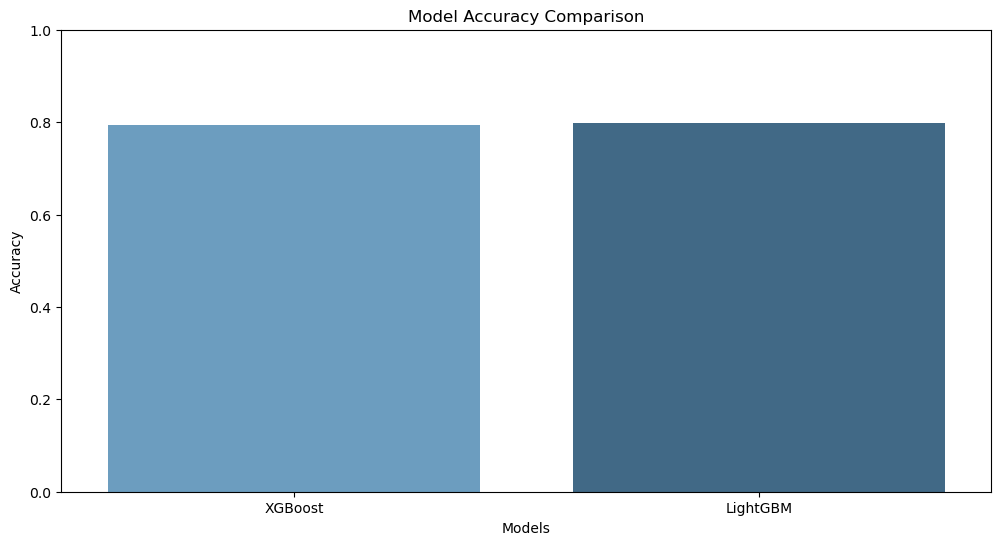

In [97]:
# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

C:\Users\srush\AppData\Local\Temp\ipykernel_12456\2555239181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Greens_d')


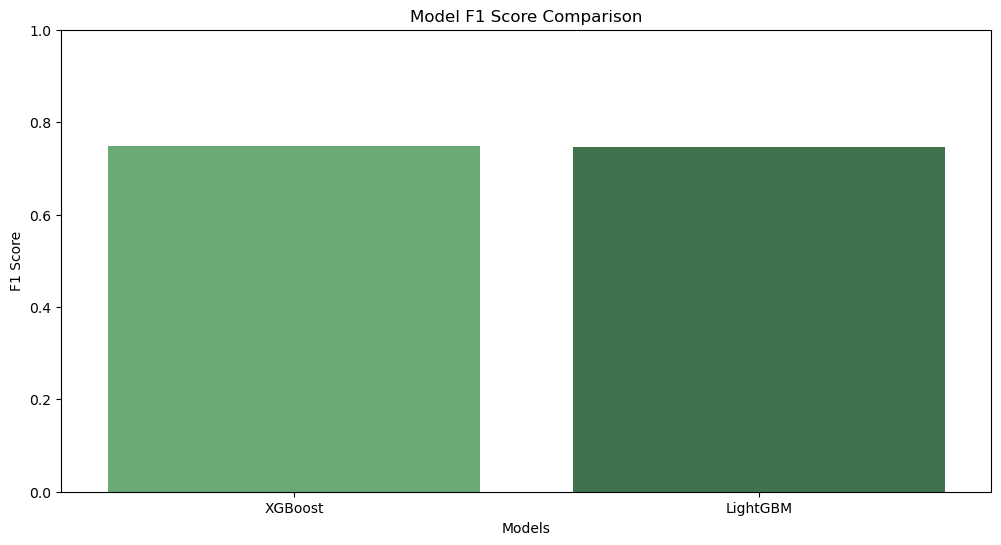

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Greens_d')
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xlabel('Models')
plt.ylim(0, 1)
plt.show()

In [99]:
'''
Weaknesses:
LightGBM performed well but had the lowest recall, suggesting it may be missing some survivors in its predictions, which could be critical in certain applications.
Visualizations: The bar plots visualize the accuracy and F1 score comparisons between the three models, highlighting the strengths and weaknesses of each.
'''

'\nWeaknesses:\nLightGBM performed well but had the lowest recall, suggesting it may be missing some survivors in its predictions, which could be critical in certain applications.\nVisualizations: The bar plots visualize the accuracy and F1 score comparisons between the three models, highlighting the strengths and weaknesses of each.\n'